In [2]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"

In [107]:
#importing the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/vivekdubas/Downloads/Dataset.csv")

print("Initial shape:", df.shape)
df.head()

Initial shape: (535178, 10)


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,11,'C1760492708','1','F','28007','M1823072687','28007','es_transportation',52.35,0
1,172,'C1222389110','3','M','28007','M1823072687','28007','es_transportation',14.75,0
2,106,'C879949041','3','F','28007','M1823072687','28007','es_transportation',3.73,0
3,86,'C409740988','5','M','28007','M1823072687','28007','es_transportation',61.42,0
4,152,'C671449181','3','F','28007','M692898500','28007','es_health',9.05,0


In [109]:
str_cols = ['customer', 'age', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category']
df[str_cols] = df[str_cols].apply(lambda col: col.str.replace("'", "", regex=False))

df['age'] = pd.to_numeric(df['age'], errors='coerce')

print("Missing values:\n", df.isnull().sum())

print("Unique values in zipcodeOri:", df['zipcodeOri'].nunique())
if df['zipcodeOri'].nunique() == 1:
    df.drop('zipcodeOri', axis=1, inplace=True)
if df['zipMerchant'].nunique() == 1:
    df.drop('zipMerchant', axis=1, inplace=True)

Missing values:
 step              0
customer          0
age            1057
gender            0
zipcodeOri        0
merchant          0
zipMerchant       0
category          0
amount            0
fraud             0
dtype: int64
Unique values in zipcodeOri: 1


In [110]:
df

,step,customer,age,gender,merchant,category,amount,fraud
0,11,C1760492708,1.0,F,M1823072687,es_transportation,52.35,0
1,172,C1222389110,3.0,M,M1823072687,es_transportation,14.75,0
2,106,C879949041,3.0,F,M1823072687,es_transportation,3.73,0
3,86,C409740988,5.0,M,M1823072687,es_transportation,61.42,0
4,152,C671449181,3.0,F,M692898500,es_health,9.05,0
...,...,...,...,...,...,...,...,...
535173,40,C1913044357,5.0,F,M348934600,es_transportation,38.12,0
535174,86,C1341159565,2.0,F,M348934600,es_transportation,38.63,0
535175,117,C1048588440,6.0,M,M1823072687,es_transportation,0.01,0
535176,47,C1134333439,3.0,M,M348934600,es_transportation,20.37,0


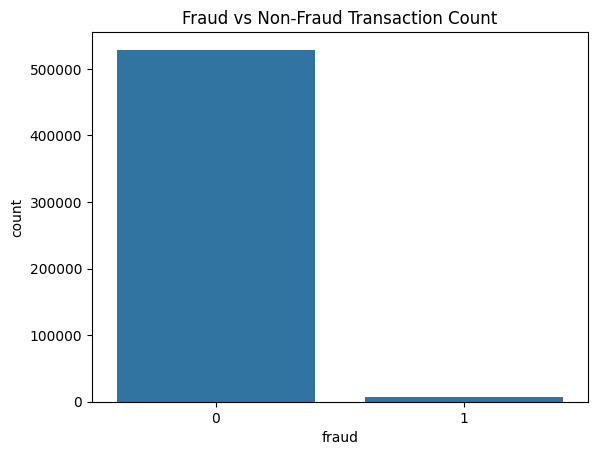

Fraud Rate (%):
 fraud
0    98.786946
1     1.213054
Name: proportion, dtype: float64


In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='fraud', data=df)
plt.title('Fraud vs Non-Fraud Transaction Count')
plt.show()

fraud_rate = df['fraud'].value_counts(normalize=True) * 100
print("Fraud Rate (%):\n", fraud_rate)

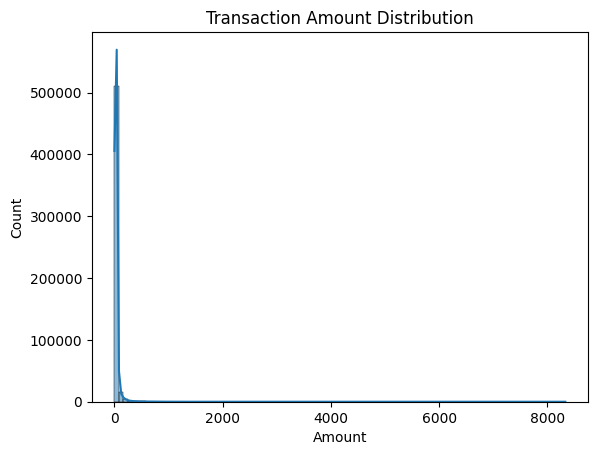

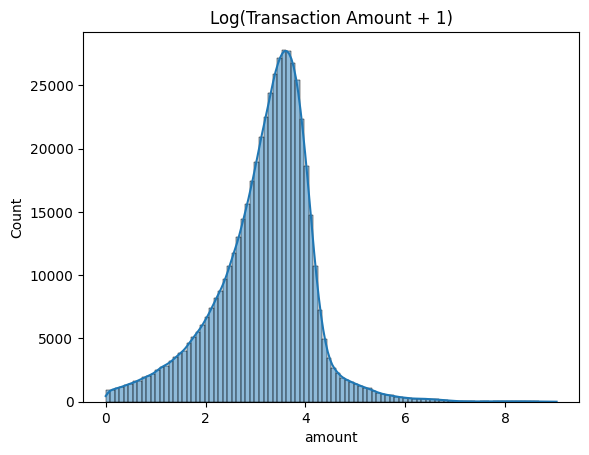

In [112]:
sns.histplot(df['amount'], bins=100, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.show()

import numpy as np
sns.histplot(np.log1p(df['amount']), bins=100, kde=True)
plt.title('Log(Transaction Amount + 1)')
plt.show()

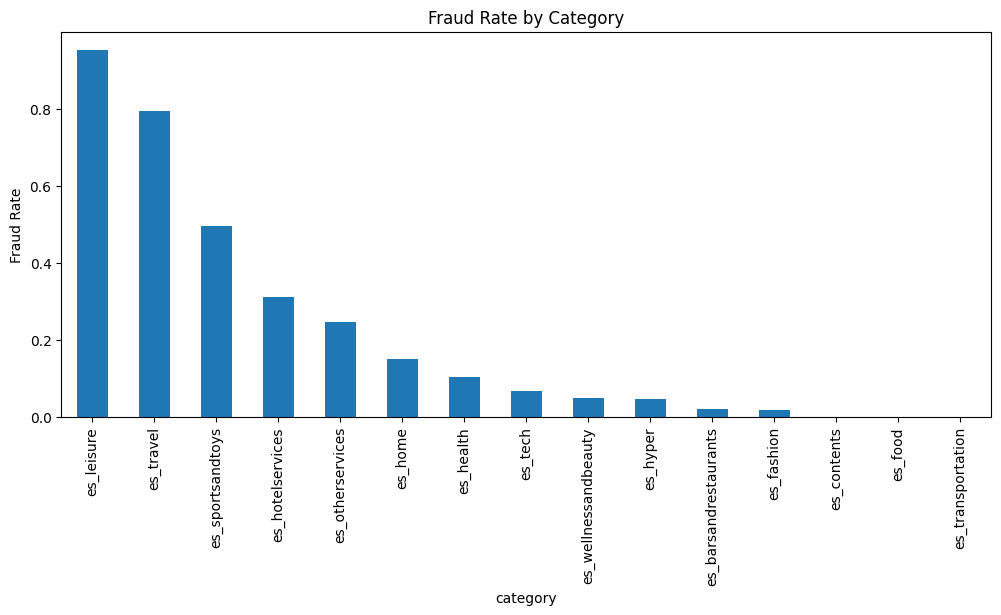

In [113]:
# Fraud rate per category
fraud_by_cat = df.groupby('category')['fraud'].mean().sort_values(ascending=False)
fraud_by_cat.plot(kind='bar', figsize=(12, 5), title='Fraud Rate by Category')
plt.ylabel('Fraud Rate')
plt.show()

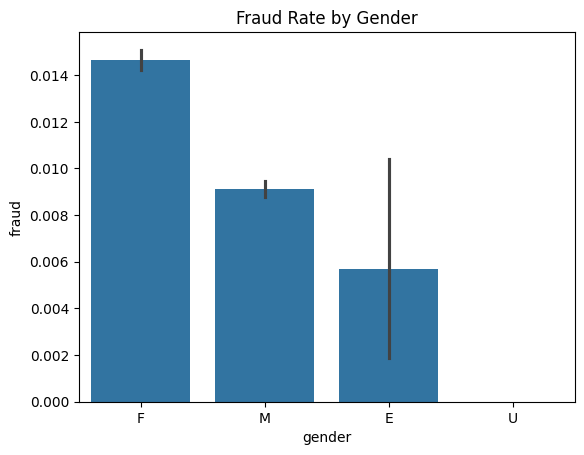

In [114]:
sns.barplot(x='gender', y='fraud', data=df)
plt.title("Fraud Rate by Gender")
plt.show()

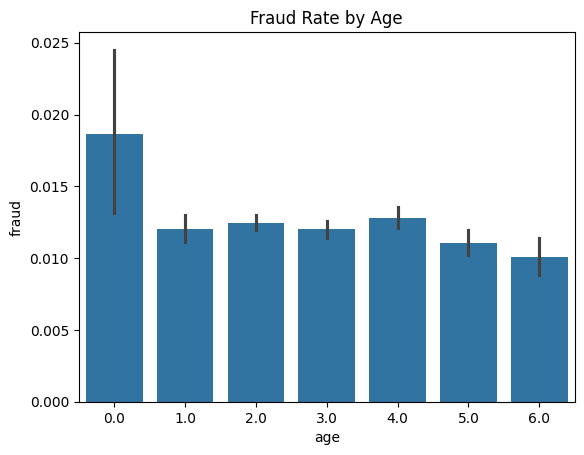

In [115]:
df_age_sorted = df.copy()
df_age_sorted['age'] = pd.to_numeric(df_age_sorted['age'], errors='coerce')

sns.barplot(x='age', y='fraud', data=df_age_sorted)
plt.title("Fraud Rate by Age")
plt.show()

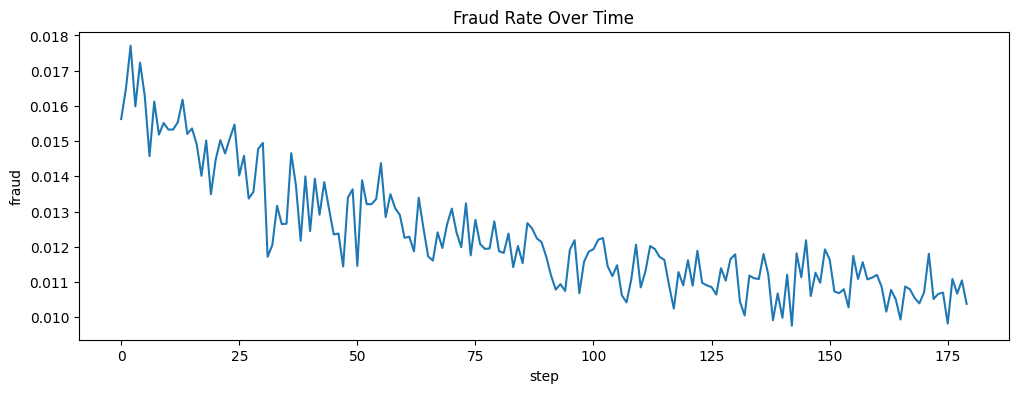

In [116]:
# Fraud vs Step
plt.figure(figsize=(12, 4))
sns.lineplot(x='step', y='fraud', data=df.groupby('step')['fraud'].mean().reset_index())
plt.title("Fraud Rate Over Time")
plt.show()

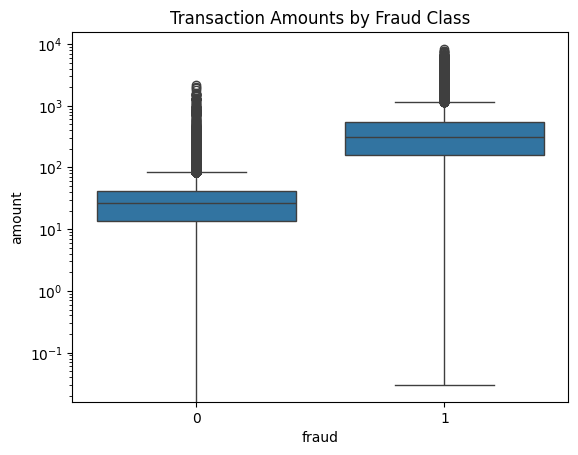

In [117]:
sns.boxplot(x='fraud', y='amount', data=df)
plt.title("Transaction Amounts by Fraud Class")
plt.yscale('log')
plt.show()

In [118]:
# Merchants with highest fraud rate
top_fraud_merchants = df.groupby('merchant')['fraud'].mean().sort_values(ascending=False)
print(top_fraud_merchants)

merchant
M1294758098    0.965116
M3697346       0.943662
M1873032707    0.864035
M732195782     0.849732
M980657600     0.830508
M1353266412    0.826087
M857378720     0.754545
M2080407379    0.738095
M2011752106    0.661972
M17379832      0.637097
M2122776122    0.572347
M480139044     0.464851
M1741626453    0.372141
M495352832     0.354839
M923029380     0.310105
M1888755466    0.246324
M1198415165    0.231579
M933210764     0.193548
M1748431652    0.130435
M547558035     0.122261
M840466850     0.113222
M348875670     0.106383
M1649169323    0.102176
M1535107174    0.096544
M50039827      0.047733
M855959430     0.046422
M78078399      0.027778
M209847108     0.027520
M151143676     0.018962
M692898500     0.017391
M1313686961    0.000000
M97925176      0.000000
M1600850729    0.000000
M1726401631    0.000000
M85975013      0.000000
M1788569036    0.000000
M1823072687    0.000000
M1842530320    0.000000
M1872033263    0.000000
M1400236507    0.000000
M348934600     0.000000
M677738

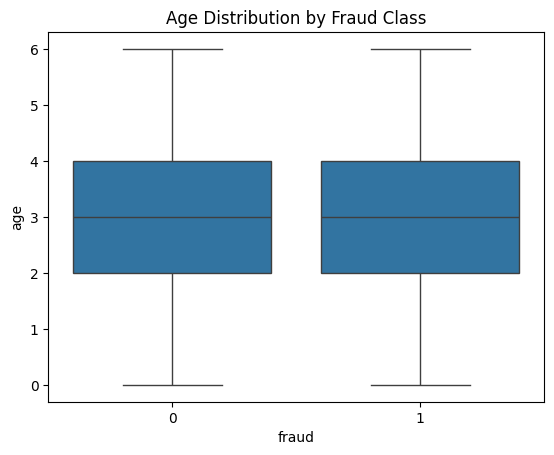

In [119]:
df_age = df.copy()
df_age['age'] = pd.to_numeric(df_age['age'], errors='coerce')
sns.boxplot(x='fraud', y='age', data=df_age)
plt.title("Age Distribution by Fraud Class")
plt.show()

In [120]:
#one hot encoding
df_encoded = pd.get_dummies(df, columns=['gender', 'category'], drop_first=True)

In [121]:
df_encoded.head()

,step,customer,age,merchant,amount,fraud,gender_F,gender_M,gender_U,category_es_contents,...,category_es_home,category_es_hotelservices,category_es_hyper,category_es_leisure,category_es_otherservices,category_es_sportsandtoys,category_es_tech,category_es_transportation,category_es_travel,category_es_wellnessandbeauty
0,11,C1760492708,1.0,M1823072687,52.35,0,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,172,C1222389110,3.0,M1823072687,14.75,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,106,C879949041,3.0,M1823072687,3.73,0,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,86,C409740988,5.0,M1823072687,61.42,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,152,C671449181,3.0,M692898500,9.05,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [122]:
df_encoded.drop('category_es_food', axis=1, inplace=True)
df_encoded.drop('category_es_transportation', axis=1, inplace=True)
df_encoded.drop('category_es_contents', axis=1, inplace=True)

In [123]:
import numpy as np
df_encoded['log_amount'] = np.log1p(df['amount'])

In [124]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_encoded.copy()

le_customer = LabelEncoder()
le_merchant = LabelEncoder()

df_encoded['customer'] = le_customer.fit_transform(df_encoded['customer'])
df_encoded['merchant'] = le_merchant.fit_transform(df_encoded['merchant'])

In [106]:
########### while testing run this ############
X=X.dropna()
y=y.loc[X.index]

In [125]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = df_encoded.copy()

X = df.drop(columns=['fraud'])
y = df['fraud']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_normal = X_scaled[y == 0]   # for training the autoencoder (only genuine)
X_full = X_scaled             # full feature set for later classifier

In [126]:
# Check for NaNs
print("NaNs in X_normal:", np.isnan(X_normal).sum().sum())

# Check for infinite values
print("Infs in X_normal:", np.isinf(X_normal).sum().sum())

NaNs in X_normal: 1051
Infs in X_normal: 0


In [127]:
# Drop rows with NaNs or Infs
X_normal = X_normal[~X_normal.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

In [128]:
X_full = X_full[~X_full.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

In [129]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_dim = X_normal.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
bottleneck = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(bottleneck)
decoded = Dense(64, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

history = autoencoder.fit(
    X_normal, X_normal,
    epochs=20,
    batch_size=1024,
    shuffle=True,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
464/464 [==============================] - 1s 1ms/step - loss: 0.1328 - val_loss: 0.0105
Epoch 2/20
464/464 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0058
Epoch 3/20
464/464 [==============================] - 0s 1ms/step - loss: 0.0041 - val_loss: 0.0031
Epoch 4/20
464/464 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 5/20
464/464 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 6/20
464/464 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 7/20
464/464 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 8/20
464/464 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 9/20
464/464 [==============================] - 1s 1ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 10/20
464/464 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0012

In [130]:
# Reconstruct all data (X_full was cleaned earlier)
reconstructed = autoencoder.predict(X_full)

# Compute Mean Squared Error for each record
reconstruction_error = np.mean(np.square(X_full - reconstructed), axis=1)

# Add error as a new feature
X_full['recon_error'] = reconstruction_error

16692/16692 [==============================] - 3s 178us/step


/var/folders/6t/tynm04252pl3zqbyz2rhhpv80000gn/T/ipykernel_39076/2917813281.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_full['recon_error'] = reconstruction_error


In [131]:
X_full.head(30)

,step,customer,age,merchant,amount,gender_F,gender_M,gender_U,category_es_fashion,category_es_health,...,category_es_hotelservices,category_es_hyper,category_es_leisure,category_es_otherservices,category_es_sportsandtoys,category_es_tech,category_es_travel,category_es_wellnessandbeauty,log_amount,recon_error
0,-1.644891,-0.333119,-1.513753,-0.682694,0.127946,0.912270,-0.907053,-0.029458,-0.104699,-0.167357,...,-0.054138,-0.101431,-0.029202,-0.039078,-0.082282,-0.063406,-0.035299,-0.161458,0.837517,0.000055
1,1.508484,-1.304913,-0.004815,-0.682694,-0.206023,-1.096167,1.102471,-0.029458,-0.104699,-0.167357,...,-0.054138,-0.101431,-0.029202,-0.039078,-0.082282,-0.063406,-0.035299,-0.161458,-0.438531,0.000036
2,0.215796,1.531176,-0.004815,-0.682694,-0.303905,0.912270,-0.907053,-0.029458,-0.104699,-0.167357,...,-0.054138,-0.101431,-0.029202,-0.039078,-0.082282,-0.063406,-0.035299,-0.161458,-1.696675,0.000045
3,-0.175927,0.705319,1.504122,-0.682694,0.208507,-1.096167,1.102471,-0.029458,-0.104699,-0.167357,...,-0.054138,-0.101431,-0.029202,-0.039078,-0.082282,-0.063406,-0.035299,-0.161458,1.001737,0.000042
4,1.116760,1.154942,-0.004815,1.762373,-0.256652,0.912270,-0.907053,-0.029458,-0.104699,5.975265,...,-0.054138,-0.101431,-0.029202,-0.039078,-0.082282,-0.063406,-0.035299,-0.161458,-0.908426,0.002066
5,1.293036,-1.400237,-0.004815,-0.682694,-0.102191,0.912270,-0.907053,-0.029458,-0.104699,-0.167357,...,-0.054138,-0.101431,-0.029202,-0.039078,-0.082282,-0.063406,-0.035299,-0.161458,0.142119,0.000032
6,0.979657,-0.906747,-0.759284,-0.682694,-0.145003,-1.096167,1.102471,-0.029458,-0.104699,-0.167357,...,-0.054138,-0.101431,-0.029202,-0.039078,-0.082282,-0.063406,-0.035299,-0.161458,-0.059917,0.000032
7,0.901312,-1.223087,0.749653,-0.682694,-0.173692,0.912270,-0.907053,-0.029458,-0.104699,-0.167357,...,-0.054138,-0.101431,-0.029202,-0.039078,-0.082282,-0.063406,-0.035299,-0.161458,-0.221068,0.000026
8,-0.215100,0.687604,-0.759284,0.714487,-0.049964,-1.096167,1.102471,-0.029458,-0.104699,-0.167357,...,-0.054138,-0.101431,-0.029202,-0.039078,-0.082282,-0.063406,-0.035299,-0.161458,0.345189,0.000038
9,-0.293445,-0.342398,0.749653,-0.682694,0.268196,0.912270,-0.907053,-0.029458,-0.104699,-0.167357,...,-0.054138,-0.101431,-0.029202,-0.039078,-0.082282,-0.063406,-0.035299,-0.161458,1.108679,0.000127


In [132]:
from sklearn.model_selection import train_test_split

# Target
y = df_encoded['fraud']

# Add the label back to X_full
X_full = X_full.copy()
X_full['fraud'] = y

# Drop rows with missing values
X_full = X_full.dropna()

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_full.drop(columns=['fraud']), X_full['fraud'],
    test_size=0.2, stratify=X_full['fraud'], random_state=42
)

In [133]:
from tensorflow.keras import backend as K
def focal_loss(gamma=1., alpha=1.5):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)  # 👈 Add this line
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        
        cross_entropy = -y_true * K.log(y_pred) - (1 - y_true) * K.log(1 - y_pred)
        weight = alpha * y_true * K.pow(1 - y_pred, gamma) + \
                 (1 - alpha) * (1 - y_true) * K.pow(y_pred, gamma)
        
        loss = weight * cross_entropy
        return K.mean(loss, axis=-1)
    
    return focal_loss_fixed

In [137]:
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before resampling:", y_train.value_counts().to_dict())
print("After resampling:", pd.Series(y_resampled).value_counts().to_dict())

# Model definition
input_dim = X_resampled.shape[1]

model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss=focal_loss(gamma=2., alpha=0.25), 
    metrics=['Precision', 'Recall', 'AUC']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train using balanced data
history = model.fit(
    X_resampled, y_resampled,
    epochs=30,
    batch_size=1024,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Before resampling: {0: 422107, 1: 5189}
After resampling: {0: 422107, 1: 422107}
Epoch 1/30
660/660 [==============================] - 1s 2ms/step - loss: 0.0151 - precision: 0.9520 - recall: 0.8991 - auc: 0.9891 - val_loss: 0.0123 - val_precision: 1.0000 - val_recall: 0.9334 - val_auc: 0.0000e+00
Epoch 2/30
660/660 [==============================] - 1s 2ms/step - loss: 0.0085 - precision: 0.9710 - recall: 0.9397 - auc: 0.9964 - val_loss: 0.0106 - val_precision: 1.0000 - val_recall: 0.9485 - val_auc: 0.0000e+00
Epoch 3/30
660/660 [==============================] - 1s 2ms/step - loss: 0.0076 - precision: 0.9733 - recall: 0.9462 - auc: 0.9970 - val_loss: 0.0094 - val_precision: 1.0000 - val_recall: 0.9551 - val_auc: 0.0000e+00
Epoch 4/30
660/660 [==============================] - 1s 2ms/step - loss: 0.0072 - precision: 0.9758 - recall: 0.9478 - auc: 0.9974 - val_loss: 0.0075 - val_precision: 1.0000 - val_recall: 0.9588 - val_auc: 0.0000e+00
Epoch 5/30
660/660 [===========================

In [138]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict
y_pred_probs = model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.67).astype(int)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# AUC Score
auc_score = roc_auc_score(y_test, y_pred_probs)
print("AUC-ROC Score:", auc_score)

3339/3339 [==============================] - 1s 186us/step
Confusion Matrix:
 [[105237    291]
 [   246   1051]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105528
           1       0.78      0.81      0.80      1297

    accuracy                           0.99    106825
   macro avg       0.89      0.90      0.90    106825
weighted avg       1.00      0.99      1.00    106825

AUC-ROC Score: 0.9974782496967776


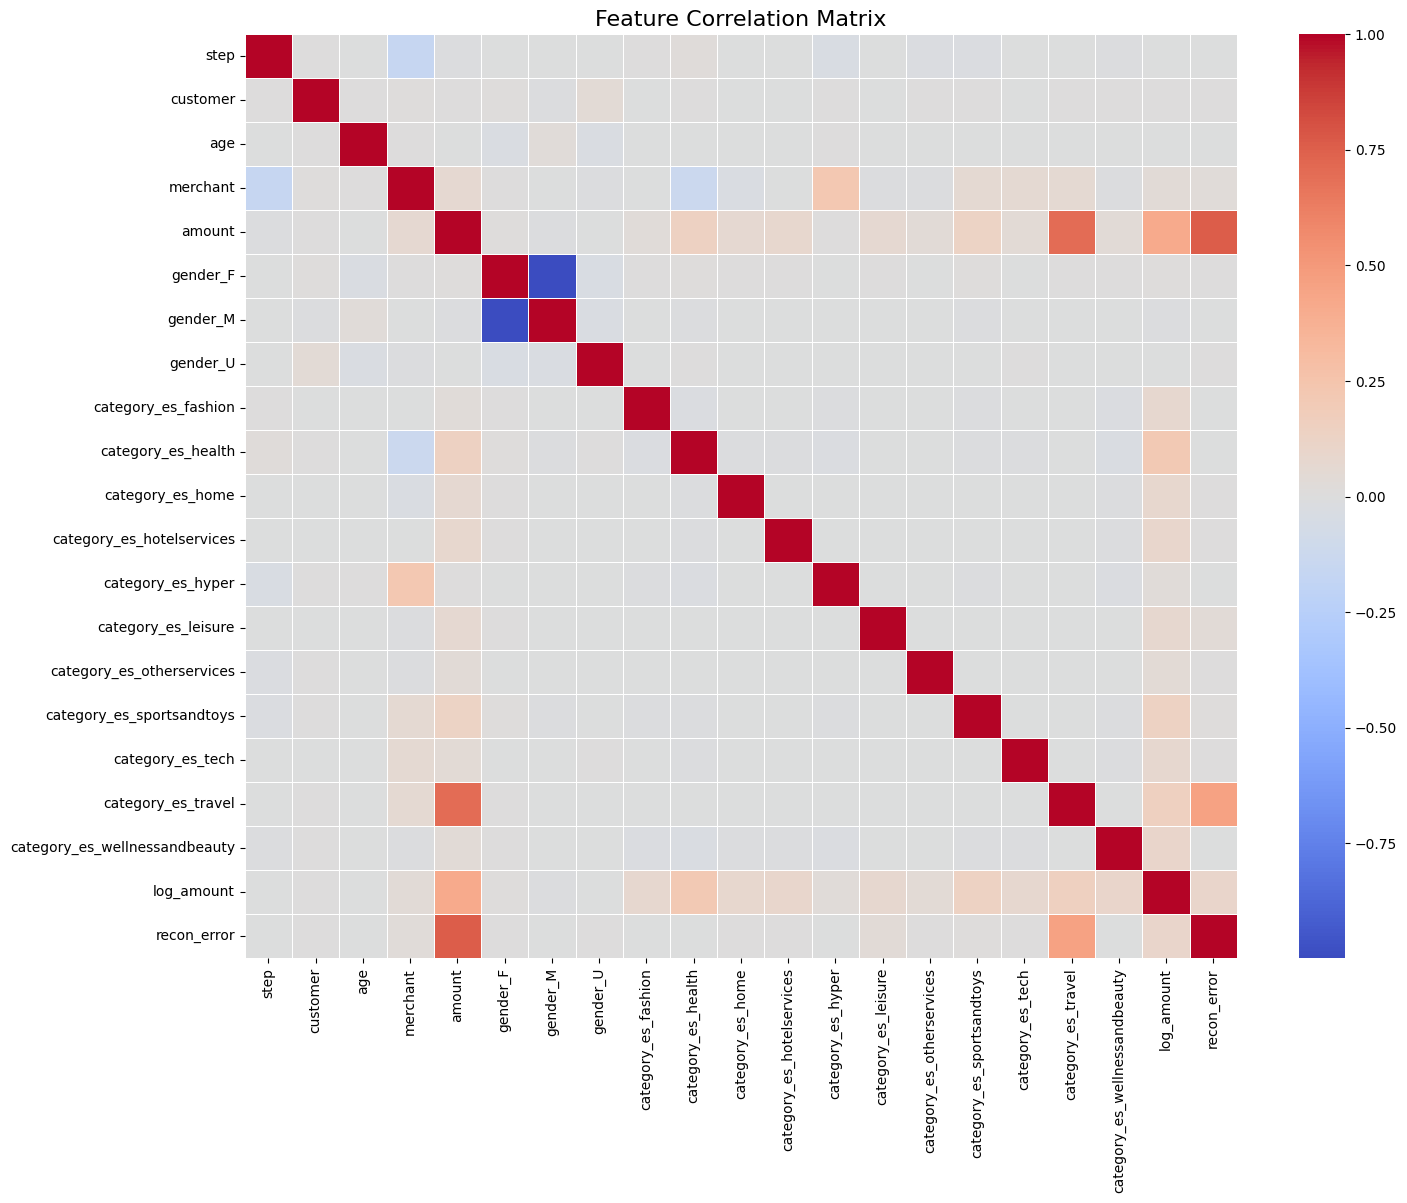

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns if any (e.g., 'customer', 'merchant' IDs if not encoded)
numeric_df = X_full.drop(columns=['fraud']) if 'fraud' in X_full.columns else X_full

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.show()


In [139]:
import os
os.getcwd()

'/Users/vivekdubas'